# Bar plots of coefficients as determined by Lasso,Elasticnet,Ridge

In [54]:
import numpy as np
import pandas as pd
import csv
import os
np.random.seed(12345)
import seaborn as sbn
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from IPython.display import HTML
from IPython.display import display



In [91]:
fulldata = pd.read_csv('/Users/rigel/Course Docs/Fall-2018/MachineLearning/project/dataset/OnlineNewsPopularity/OnlineNewsPopularity.csv') 
data = fulldata.sample(n=700, random_state = 0)
data.to_csv(path_or_buf ='/Users/rigel/Course Docs/Fall-2018/MachineLearning/project/dataset/OnlineNewsPopularity/OnlineNewsPopularitysample.csv' )
data = data.drop(['url',' timedelta'],axis = 1)
std_data = data.copy()
for column in data.columns:
        if column!=' shares':
            std_data[column] = preprocessing.scale(data[column])
def popular(s):
    return 1 if s>1400 else 0
std_data[' popularity'] = data[' shares'].apply(popular)
std_data = std_data.drop([' shares'],axis = 1)
#std_data.head(n=5)
std_data.describe()



,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,popularity
count,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,700.000000
mean,2.976191e-16,-2.204586e-17,3.876264e-16,1.036472e-16,-2.053913e-16,-5.519394e-17,1.617754e-17,3.632015e-17,3.013462e-18,-5.540806e-16,9.058230e-17,1.555898e-16,6.042785e-17,-8.009466e-17,8.861959e-17,1.268826e-18,4.187127e-17,6.819941e-18,2.751767e-17,-1.387779e-17,8.941260e-17,2.439319e-16,-1.942890e-16,-3.172066e-18,6.978545e-18,-7.041986e-17,-4.833435e-17,-7.028108e-17,-1.453500e-16,-1.227589e-16,-1.524178e-16,-2.973812e-17,3.159378e-16,6.756500e-17,9.809613e-17,9.111759e-17,-8.547131e-16,1.855658e-17,-7.398843e-17,-7.866723e-17,-1.617754e-17,-3.869920e-17,7.862758e-17,-5.360791e-17,3.247402e-17,-2.375084e-16,-3.841372e-16,-2.464695e-16,2.445266e-16,-1.114981e-16,3.091178e-16,1.512282e-16,2.358431e-16,8.390114e-17,-1.985713e-16,1.387779e-16,-1.868347e-16,-1.265654e-16,0.504286
std,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,0.500339
min,-2.634612e+00,-1.205377e+00,-4.155818e+00,-6.538348e+00,-4.750647e+00,-8.995203e-01,-8.013834e-01,-5.686729e-01,-3.231454e-01,-6.090884e+00,-2.196558e+00,-2.803256e-01,-4.294568e-01,-4.525696e-01,-2.328452e-01,-4.730499e-01,-5.377122e-01,-3.739337e-01,-2.198538e-01,-2.554222e-01,-2.313504e-01,-3.868428e+00,-1.944912e+00,-9.545685e-01,-7.937709e-01,-1.797867e+00,-1.883602e-01,-2.728253e-01,-2.530852e-01,-4.548588e-01,-4.955316e-01,-4.662524e-01,-4.910547e-01,-4.294568e-01,-2.328452e-01,-2.328452e-01,-3.385996e-01,-6.602491e-01,-5.368512e-01,-7.039949e-01,-6.645135e-01,-7.632218e-01,-4.099956e+00,-3.088131e+

**************** Case: 2p ****************
size is  116


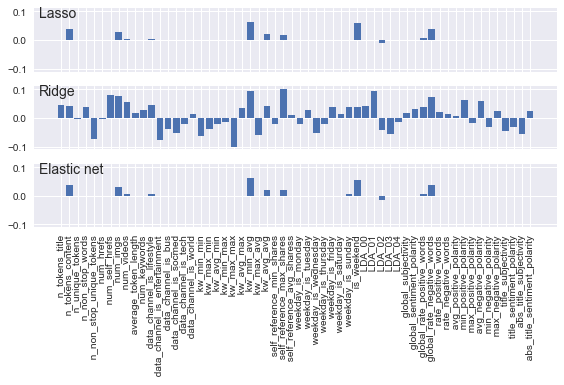

**************** Case: 10p ****************
size is  580


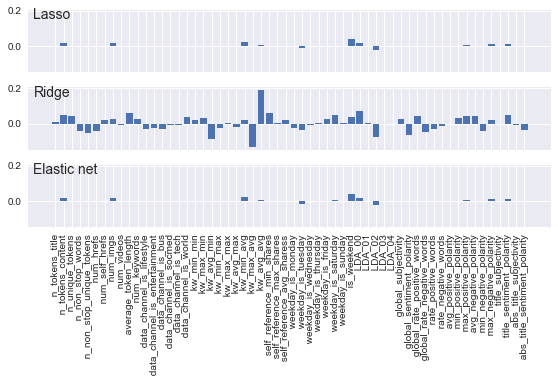

In [90]:
 alphas = np.logspace(-5,5,100)
# kFold=10
# cpus = 2

#---splitting the data into 2p and 10p---
p = (len(std_data.loc[:,:' abs_title_sentiment_polarity'].columns))
n_learn = {'2p': 2*p, '10p': 10*p}
n_total = len(std_data.index)

#--- classifiers ---

def lassocv(size,x_train, y_train, x_test):
    clf = LassoCV(max_iter=100000)
    clf.fit(x_train, y_train)
    #print("Coefficients for Lasso:    "   + str(pd.Series(clf.coef_, index=x_train.columns)))
    xlabels = list(x_train)
    return xlabels, list(clf.coef_)

#     plt.bar(range(len(xlabels)), list(clf.coef_))
#     plt.ylabel('Fitted Coefficients', fontsize=16)
#     plt.xticks(range(len(xlabels)),xlabels, rotation='vertical', fontsize= 10)
#     plt.title('Coefficients for LassoCV size:'+str(n_learn_size), fontsize= 16)
#     plt.tight_layout()
#     plt.savefig ("laaso-"+size+".png", dpi = 1200,pad_inches = 0)
#     plt.show()
    
def elastic_netcv(size,x_train, y_train, x_test):
    
    clf = ElasticNetCV(l1_ratio = 0.5,max_iter=100000)
    clf.fit(x_train, y_train)
    xlabels = list(x_train)
    return xlabels, list(clf.coef_)

#     plt.bar(range(len(xlabels)), list(clf.coef_))
#     plt.ylabel('Fitted Coefficients', fontsize=16)
#     plt.xticks(range(len(xlabels)),xlabels, rotation='vertical', fontsize= 10)
#     plt.title('Coefficients for Elastic Net size:'+str(n_learn_size), fontsize= 16)
#     plt.tight_layout()
#     plt.savefig ("elasticnet-"+size+".png", dpi = 1200,pad_inches = 0)
#     plt.show()

def ridgecv(size,x_train, y_train, x_test):
    clf = RidgeCV()
    clf.fit(x_train, y_train)
    xlabels = list(x_train)
    return xlabels, list(clf.coef_)

#     plt.bar(range(len(xlabels)), list(clf.coef_))
#     plt.ylabel('Fitted Coefficients', fontsize=16)
#     plt.xticks(range(len(xlabels)),xlabels, rotation='vertical', fontsize= 10)
#     plt.title('Coefficients for Ridge CV size:'+str(n_learn_size), fontsize= 16)
#     plt.tight_layout()
#     plt.savefig ("ridgecv-"+size+".png", dpi = 1200,pad_inches = 0)
#     plt.show()


for n_learn_size in n_learn:
    print("**************** Case: " +str(n_learn_size),"****************")
    #print ("n_learn case is: ", n_learn_size)
    size = n_learn[n_learn_size]
    print ("size is ", size) 
    train_set, test_set = train_test_split(std_data, train_size=1.0*size/n_total, random_state=99)
    X_train = train_set.loc[:,:' abs_title_sentiment_polarity']
    Y_train = train_set.loc[:,' popularity']
    X_test = test_set.loc[:,:' abs_title_sentiment_polarity']
    Y_test = test_set.loc[:,' popularity']
    xlabels, lasso_coefs = lassocv(n_learn_size,X_train,Y_train,X_test)
    xlabels, elasticnet_coefs = elastic_netcv(n_learn_size,X_train,Y_train,X_test)
    xlabels, ridge_coefs = ridgecv(n_learn_size,X_train,Y_train,X_test)

    f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
    ax1.bar(range(len(xlabels)), lasso_coefs)
    ax1.text(0.01, 0.85, "Lasso", size=14, transform=ax1.transAxes)
    ax2.bar(range(len(xlabels)), ridge_coefs)
    ax2.text(0.01, 0.85, "Ridge", size=14, transform=ax2.transAxes)
    ax3.bar(range(len(xlabels)), elasticnet_coefs)
    ax3.text(0.01, 0.85, "Elastic net", size=14, transform=ax3.transAxes)
    ax3.set_xticks(range(len(xlabels)))
    ax3.set_xticklabels(xlabels, rotation='vertical', fontsize= 10)
   
    f.subplots_adjust(hspace=0.05)
    plt.tight_layout()
    plt.savefig (n_learn_size+".png", dpi = 1200,pad_inches = 0)
    plt.show()
    
#     plt.ylabel('Fitted Coefficients', fontsize=16)
#     plt.title('Coefficients for Ridge CV size:'+str(n_learn_size), fontsize= 16)
#     plt.tight_layout()
#     plt.xticks(range(len(xlabels)),xlabels, rotation='vertical', fontsize= 10)

